
 <center> <h1> <b> Pattern Recognition and Machine Learning (EE2802 - AI2000) </b> </h1> </center>

<b> Programming Assignment 01 - KNN : </b> Welcome to the programming assignment (PA) on k-nearest neighbors (KNN) classification. Throughout this PA, you will explore the k-NN algorithm, a versatile and intuitive method for tackling classification and regression challenges. Specifically, this assignment aims to enhance your understanding of the KNN classification algorithm. In this PA, we expect you to implement and experiment with the KNN classifier to understand how variations in 'k' and distance metrics influence classification performance.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions are not accepted
3. Please DO NOT use any machine learning libraries unless and otherwise specified.



<b> Part(a): Synthetic data generation </b>  

1. Consider four bivariate Gaussians with means at (0,0), (0,1), (1,0), and (1,1), each with a diagonal covariance matrix with diagonal elements being 0.1. Sample 90 points from each Gaussian, resulting in a total of 360 points. Allocate 30 points from each Gaussian for training and 60 points for testing. This results in a total of 120 points for training and 240 points for testing.

2. Create a 2-class training set ($[X_{train}, Y_{train}]$) and a test set ($[X_{test}, Y_{test}]$) by labeling the data sampled from Gaussians with means at (0,0) and (1,1) as class 1, and the data sampled from Gaussians with means at (0,1) and (1,0) as class 2. Assign a label of +1 to class1 and -1 to class2.

4. Visualize both train and test sets using the scatter plot on a 2-D plane. Indicate the data points from class 1 with a green color and those from class 2 with a blue color.

<b> Part(b): KNN Classification - </b> The k-Nearest Neighbors (KNN) classifier algorithm is a straightforward yet powerful tool for classification tasks. The KNN classifier takes the test data point, computes distances to all points in the training set, identifies the 'k' nearest neighbors based on these distances, and assigns the test data to the class that the majority of its neighbors belong to.

<b> Programming questions </b>


1. Develop a Python class named 'KNeighbourClassifier' that encapsulates the hyperparameters of a K-Nearest Neighbors (KNN) classifier, such as the number of neighbors (k) and the distance metric. Implement the following methods within this class. $\textit{fit(X_train, y_train):}$ This method should accept training data (X_train) and corresponding labels (y_train) as input. It should store these inputs as internal attributes of the class for later use in prediction. $\textit{predict(X_test):} This method should take test data (X_test) as input and return the predicted labels for the given data points using the KNN algorithm.

2. Instantiate an object of the KNeighbourClassifier class. Train the classifier on the provided training data by calling the fit() method. Use this trained classifier to predict the labels of the test data. Finally, evaluate the classifier's accuracy by comparing the predicted labels with the actual (original) labels of the test data

3. Generate a 2D scatter plot of the test data, assigning green to class 1, blue to class 2, and red to test data points whose predicted labels do not match their true labels.

4. Visualize the decision boundaries of a given classifier by generating a 2D grid and predicting the class labels for each point in the grid using the KNN algorithm. Color-code the grid points based on their predicted class labels to visually represent the decision regions

<b> Part(c): Parameter selection: What is good value for k? - </b> A common approach to finding the optimal value for the hyperparameter 'k' in K-Nearest Neighbors is through cross-validation. In this method, a portion (ρ%) of the training data is set aside as a validation set. The KNN model is then trained on the remaining data and evaluated on the validation set for a range of 'k' values. The optimal 'k' is selected as the value that results in the best performance on the validation set.

<b> Algorithm </b>

1. Perform hold-out cross-validation by setting aside a fraction (ρ of the training set for validation. Note: You may use ρ = 0.3, and repeat the procedure 10 times. The hold-out procedure may be quite unstable.
2. Use a large range of candidate values for k (e.g. k = 1, 3, 5..., 21). Notice odd numbers are considered to avoid ties.
3. Repeat the process for 10 times using a random cross-validation set each time with a ρ = 0.3.
4. Plot the training and validation errors for the different values of k.

<b> Questions </b>

5. How would you now answer the question "what is the best value for k"?
6. How is the value of k affected by ρ (percentage of points held out) and number of repetitions? What does a large number of repetitions provide?
7. Apply the model obtained by cross-validation (i.e., best k) to the test set and check if there is an improvement on the classification error over the result of Part (b).

<b> Part(d): Influence of training data on KNN classifier - </b>

1. Evaluate the performance as the size of the training set
grows, e.g., n = {200, 400, 1200,...}. How would you choose a good range for k as n changes? What can you say about the stability of the solution? Check by repeating the validation multiple times.

2. Investigate how the distribution of the training data affects the performance of the KNN algorithm. Replace the Gaussian distribution used in part (a) with a Laplacian distribution. Generate both training and testing datasets based on these distributions. Evaluate the KNN classifier's performance on both datasets. Analyze whether the KNN achieves comparable performance with both Gaussian and Laplacian distributed data. Examine the effect of changing the distance metric from $l_{2}$ to $l_{1}$ on the KNN performance for both Gaussian and Laplacian distributed datasets


<b> Part(e): What is the influence of distance measure on decision regions ? - </b>

1. Evaluate the performance of the KNN classifier with different distance measures such as $l_{1}$, $l_{2}$, etc,.
2. Plot the decision regions of the KNN classifier with different distance measures.
3. Report your observations.  

<b> Part(f): MNIST Digit classification using KNN classifier: </b> :

1. Use the above written KNN classifier to perform digit claissification using MNIST digit dataset.
2. The MNIST dataset consists of approximately 70,000 images of handwritten digits. Create training, validation, and test datasets from this entire dataset with the respective proportions of 80%, 10%, and 10%. The 28x28 images in the MNIST data set may be flattened to arrive at a 784 dimensional vector.
3. Use the most suitable distance metric and k to maximize the test data performance.
4. Create a confusion matrix to understand the most confused classes (digits).
5. Suggest alternate ways to improve the performance.



In [ ]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

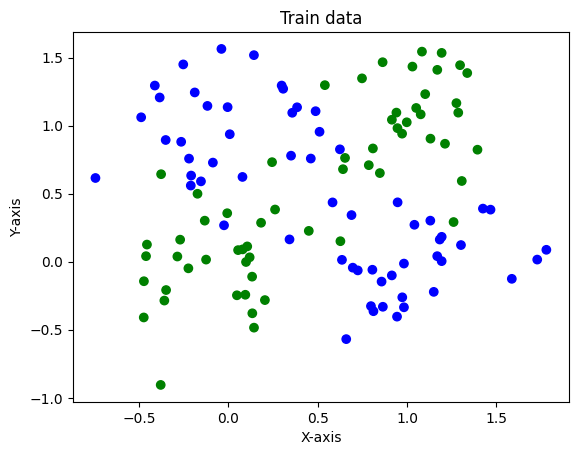

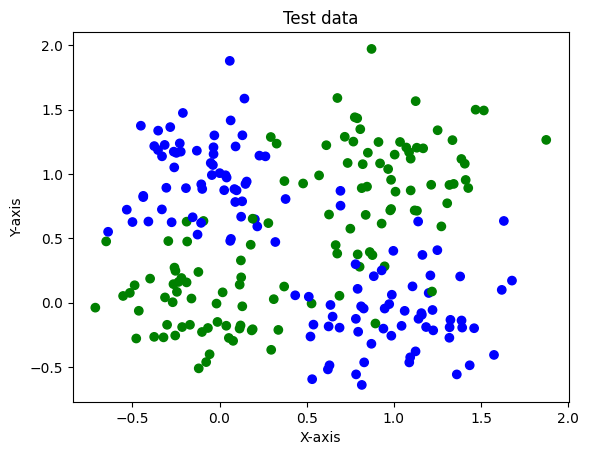

In [ ]:
########################################
#Part(a) #Synthetic data generation

# Consider four bivariate Gaussians with means at (0,0), (0,1), (1,0), and (1,1), each with a diagonal covariance matrix with
# diagonal elements being 0.1. Sample 90 points from each Gaussian, resulting in a total of 360 points. Allocate 30 points from
# each Gaussian for training and 60 points for testing. This results in a total of 120 points for training and 240 points for testing.

# Create a 2-class training set ( [Xtrain,Ytrain] ) and a test set ( [Xtest,Ytest] ) by labeling the data sampled from Gaussians with
# means at (0,0) and (1,1) as class 1, and the data sampled from Gaussians with means at (0,1) and (1,0) as class 2. Assign a label of
# +1 to class1 and -1 to class2.

# Visualize both train and test sets using the scatter plot on a 2-D plane. Indicate the data points from class 1 with a green color and
#those from class 2 with a blue color.

########################################
#Define means and covariances
mean1 = np.array([0, 0])
mean2 = np.array([0, 1])
mean3 = np.array([1, 0])
mean4 = np.array([1, 1])
cov = np.array([[0.1, 0], [0, 0.1]])

#Sample data points from the bivariate Gaussian distribution
#You can use "np.random.multivariate_normal" function to sample the data points from the multivariate Gaussian distribution
data1 = np.random.multivariate_normal(mean1, cov, 90)
data2 = np.random.multivariate_normal(mean2, cov, 90)
data3 = np.random.multivariate_normal(mean3, cov, 90)
data4 = np.random.multivariate_normal(mean4, cov, 90)

#Generate training data
X_train = np.array(np.concatenate((data1[:30], data2[:30], data3[:30], data4[:30]), axis=0))
Y_train = np.array(np.concatenate((np.ones(30), -np.ones(30), -np.ones(30), np.ones(30)), axis=0))

#Generate testing data
X_test = np.array(np.concatenate((data1[30:], data2[30:], data3[30:], data4[30:]), axis=0))
Y_test = np.array(np.concatenate((np.ones(60), -np.ones(60), -np.ones(60), np.ones(60)), axis=0))


#Visualize the data using plt.scatter() function
colors = ['green' if label == 1 else 'blue' for label in Y_train]
colors_1 = ['green' if label == 1 else 'blue' for label in Y_test]

plt.scatter(X_train[:, 0], X_train[:, 1], c=colors)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title("Train data")
plt.show()


plt.scatter(X_test[:,0], X_test[:,1], c=colors_1)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title("Test data")
plt.show()





In [ ]:
########################################
#Part(b) #KNN classification
# The k-Nearest Neighbors (KNN) classifier algorithm is a straightforward yet powerful tool for classification tasks.
# The KNN classifier takes the test data point, computes distances to all points in the training set, identifies the 'k' nearest neighbors
# based on these distances, and assigns the test data to the class that the majority of its neighbors belong to.

# Programming questions

# 1) Develop a Python class named 'KNeighbourClassifier' that encapsulates the hyperparameters of a K-Nearest Neighbors (KNN) classifier,
#    such as the number of neighbors (k) and the distance metric. Implement the following methods within this class.  fit(X_train, y_train):
#    This method should accept training data (X_train) and corresponding labels (y_train) as input. It should store these inputs as internal
#    attributes of the class for later use in prediction. predict(X_test): This method should take test data (X_test) as input and
#    return the predicted labels for the given data points using the KNN algorithm.

# 2) Instantiate an object of the KNeighbourClassifier class. Train the classifier on the provided training data by calling the fit() method.
#    Use this trained classifier to predict the labels of the test data. Finally, evaluate the classifier's accuracy by comparing the predicted
#    labels with the actual (original) labels of the test data

# 3) Generate a 2D scatter plot of the test data, assigning green to class 1, blue to class 2, and red to test data points whose predicted labels
#    do not match their true labels.

# 4) Visualize the decision boundaries of a given classifier by generating a 2D grid and predicting the class labels for each point in the grid
#    using the KNN algorithm. Color-code the grid points based on their predicted class labels to visually represent the decision regions
########################################

from collections import Counter

#Write "kNNClassify" function
class KNeighborsClassifier:
    """
    K-Nearest Neighbors Classifier
    This class implements the k-nearest neighbors algorithm for classification.
    """
    def __init__(self, n_neighbors=5,distance_metric="l2", p = 2):
      self.n_neighbors = n_neighbors
      self.distance_metric = distance_metric
      self.X_train = None
      self.y_train = None

      if(self.distance_metric == "l2"):
        self.p = 2
      elif(self.distance_metric == "l1"):
        self.p = 1
      elif(self.distance_metric == "l_inf"):
        self.p = np.inf
      else:
        self.p = p

    def fit(self, X_train,Y_train):
      #This method fits the k-nearest neighbors classifier from the training data. X_train is the training data, represented as a numpy array of shape (n_samples, n_features), and Y_train is the target values of the training data, represented as a numpy array of shape (n_samples,)
      self.X_train = X_train
      self.y_train = Y_train
      return self

    def predict(self, X_test, batch_size=100):
      y_pred = []

      for x_test in X_test:
        distances = np.linalg.norm(self.X_train - x_test, axis=1, ord=self.p)
        k_nearest_indices = np.argsort(distances)[:self.n_neighbors]
        k_nearest_labels = self.y_train[k_nearest_indices]

        label_counts = Counter(k_nearest_labels)
        max_count = max(label_counts.values())

        tied_labels = [label for label, count in label_counts.items() if count == max_count]

        chosen_label = random.choice(tied_labels)

        y_pred.append(chosen_label)


      return np.array(y_pred)

#Write "KNNAccuracy" function
def KNNAccuracy(true,pred):
    #Inputs : Ground truth and predicted labels
    #Outputs : Portion of data points that are correctly classified, i.e., accuracy
    count = 0
    for i in range(len(true)):
        if true[i] == pred[i]:
            count += 1
    return count / len(true)




Accuracy before cross validation: 0.8708333333333333


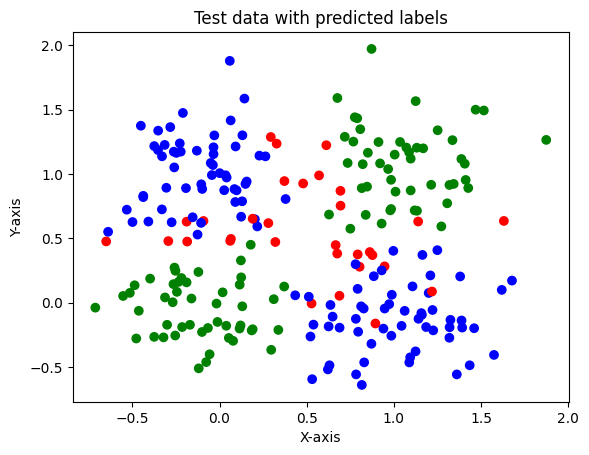

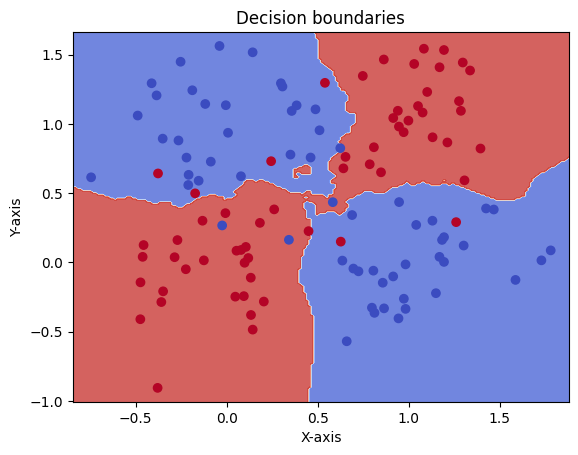

In [ ]:
# Part (b)
# Generate a 2D scatter plot of the test data, assigning green to class 1, blue to class 2, and red to test data points whose predicted labels
#    do not match their true labels.
knn = KNeighborsClassifier(5,"l2")
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
accuracy = KNNAccuracy(Y_test, y_pred)
print("Accuracy before cross validation:", accuracy)

colors = ["red" if pred != actual else "green" if pred == 1 else "blue" for pred, actual in zip(y_pred, Y_test)]
plt.scatter(X_test[:, 0], X_test[:, 1], c=colors)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Test data with predicted labels")
plt.show()

# Visualize the decision boundaries of a given classifier by generating a 2D grid and predicting the class labels for each point in the grid
#    using the KNN algorithm. Color-code the grid points based on their predicted class labels to visually represent the decision regions

x_min, x_max = X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1
y_min, y_max = X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1

grid_x = np.linspace(x_min, x_max, 200)
grid_y = np.linspace(y_min, y_max, 200)
X, Y = np.meshgrid(grid_x, grid_y)

points = np.c_[X.ravel(), Y.ravel()]
predictions = knn.predict(points).reshape(X.shape)

plt.contourf(X, Y, predictions, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=plt.cm.coolwarm)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Decision boundaries")
plt.show()



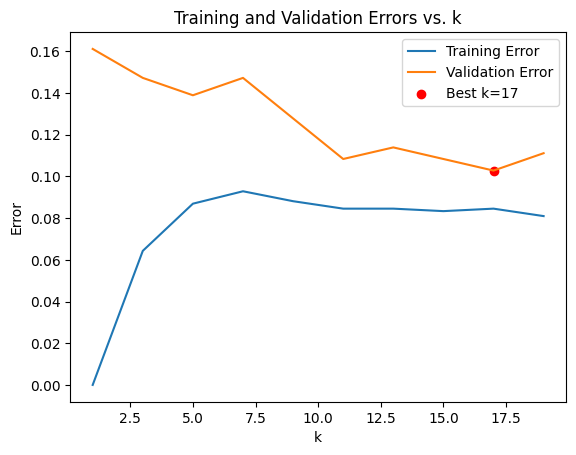

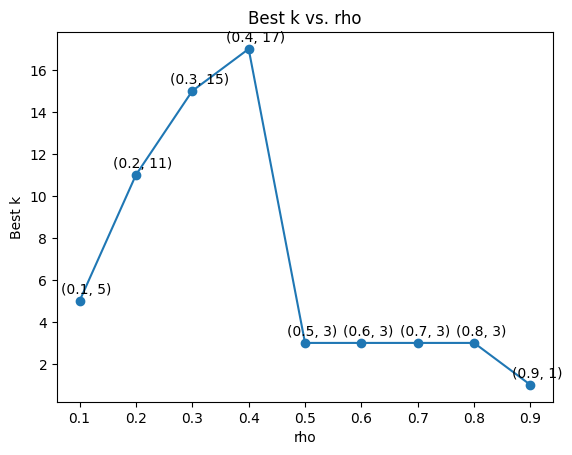

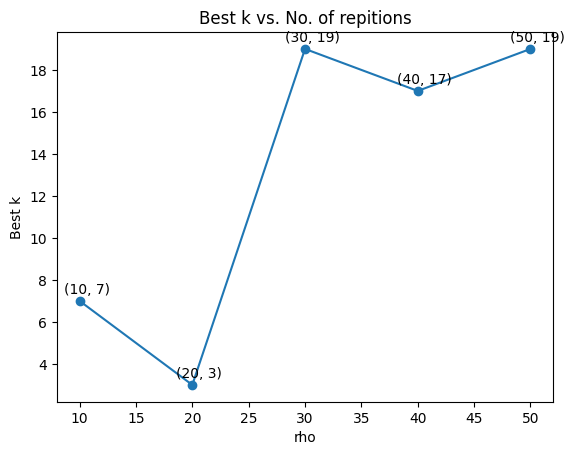

Large number of repitions provide some form of stability
Accuracy after cross-validation: 0.8708333333333333


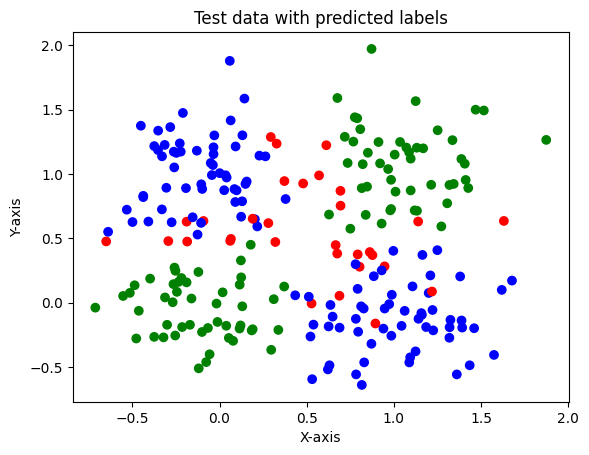

In [ ]:
####################################
#Part(c): Parameter selection: What is good value for k?

# What is good value for k? - A common approach to finding the optimal value for the hyperparameter 'k' in K-Nearest Neighbors is through
# cross-validation. In this method, a portion (ρ%) of the training data is set aside as a validation set. The KNN model is then trained on
# the remaining data and evaluated on the validation set for a range of 'k' values. The optimal 'k' is selected as the value that results in
# the best performance on the validation set.

# Algorithm:
# 1) Perform hold-out cross-validation by setting aside a fraction ρ of the training set for validation. Note: You may use ρ = 0.3, and repeat
#    the procedure 10 times. The hold-out procedure may be quite unstable.
# 2) Use a large range of candidate values for k (e.g. k = 1, 3, 5..., 21). Notice odd numbers are considered to avoid ties.
# 3) Repeat the process for 10 times using a random cross-validation set each time with a ρ = 0.3.
# 4) Plot the training and validation errors for the different values of k.

# Questions:
# 1) How would you now answer the question "what is the best value for k"?
# 2) How is the value of k affected by ρ (percentage of points held out) and number of repetitions? What does a large number of
#    repetitions provide?
# 3) Apply the model obtained by cross-validation (i.e., best k) to the test set and check if there is an improvement on the classification
#    error over the result of Part (b).
####################################


#Write holdoutCVkNN() Function
def holdoutCVkNN(k_range,rho, repitions, model):
  train_errors = {k: [] for k in k_range}
  validation_errors = {k: [] for k in k_range}
  data_size = data_size = model.X_train.shape[0]

  knn = KNeighborsClassifier(5,"l2")

  for _ in range(repitions):

    num_validation_samples = int(rho * data_size)
    indices = np.random.permutation(data_size)
    validation_indices = indices[:num_validation_samples]
    train_indices = indices[num_validation_samples:]

    x_train = model.X_train[train_indices]
    y_train = model.y_train[train_indices]
    x_val = model.X_train[validation_indices]
    y_val = model.y_train[validation_indices]

    if len(x_train) == 0:
      raise ValueError("Training set is empty.")
    if len(y_train) == 0:
      raise ValueError("Training set is empty(y)")
    if len(x_val) == 0:
      raise ValueError("Validation set empty")
    if len(x_val) == 0:
      raise ValueError("Validation set empty(y)")


    for k in k_range:
      knn.n_neighbors = k
      knn.fit(x_train, y_train)
      y_pred_train = knn.predict(x_train)
      y_pred_val = knn.predict(x_val)
      train_error = 1 - KNNAccuracy(y_train, y_pred_train)
      validation_error = 1 - KNNAccuracy(y_val, y_pred_val)
      train_errors[k].append(train_error)
      validation_errors[k].append(validation_error)

  avg_train_errors = {k: np.mean(errors) for k, errors in train_errors.items()}
  avg_validation_errors = {k: np.mean(errors) for k, errors in validation_errors.items()}

  best_k = min(avg_validation_errors, key=avg_validation_errors.get)

  return best_k, avg_train_errors, avg_validation_errors


#Plot training and validation errors for different values of k
k_range = range(1, 21, 2)
rho = 0.3
repitions = 10
model = KNeighborsClassifier(5,"l2")
model.fit(X_train, Y_train)

best_k_1, avg_train_errors, avg_validation_errors = holdoutCVkNN(k_range,rho, repitions, model)

plt.plot(k_range, [avg_train_errors[k] for k in k_range], label='Training Error')
plt.plot(k_range, [avg_validation_errors[k] for k in k_range], label='Validation Error')
plt.scatter(best_k_1, avg_validation_errors[best_k_1], color='red', label=f'Best k={best_k_1}')
plt.xlabel('k')
plt.ylabel('Error')
plt.title('Training and Validation Errors vs. k')
plt.legend()
plt.show()

#Effect of rho on k
rho_val = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
repitions = 10

best_k_values = []
for rho in rho_val:
  best_k, avg_train_errors, avg_validation_errors = holdoutCVkNN(k_range,rho, repitions, model)
  best_k_values.append(best_k)

plt.plot(rho_val, best_k_values, marker='o')

for i, (rho, best_k) in enumerate(zip(rho_val, best_k_values)):
  plt.annotate(f'({rho}, {best_k})', (rho, best_k), textcoords="offset points", xytext=(5,5), ha='center')

plt.xlabel('rho')
plt.ylabel('Best k')
plt.title('Best k vs. rho')
plt.show()

# Effect of number of repitions on k
repitions_val = [10, 20, 30, 40, 50]
best_k_values = []
for repitions in repitions_val:
  best_k, avg_train_errors, avg_validation_errors = holdoutCVkNN(k_range,0.3, repitions, model)
  best_k_values.append(best_k)

plt.plot(repitions_val, best_k_values, marker='o')
for i, (rep, best_k) in enumerate(zip(repitions_val, best_k_values)):
  plt.annotate(f'({rep}, {best_k})', (rep, best_k), textcoords="offset points", xytext=(5,5), ha='center')

plt.xlabel('rho')
plt.ylabel('Best k')
plt.title('Best k vs. No. of repitions')
plt.show()

print("Large number of repitions provide some form of stability")

#Evaluate the performance on test set with the best hyper parameters ( i.e best k ).
model.n_neighbors = best_k_1
model.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
print("Accuracy after cross-validation:", KNNAccuracy(Y_test, y_pred))


colors = ["red" if pred != actual else "green" if pred == 1 else "blue" for pred, actual in zip(y_pred, Y_test)]
plt.scatter(X_test[:, 0], X_test[:, 1], c=colors)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Test data with predicted labels")
plt.show()



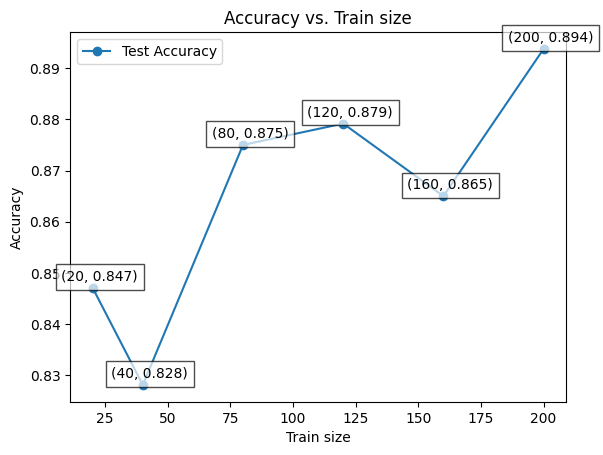

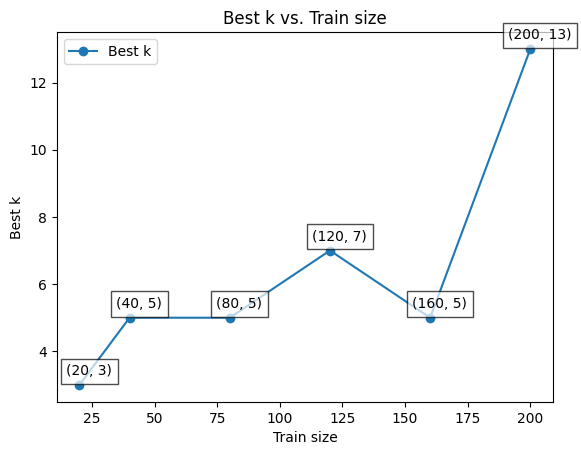

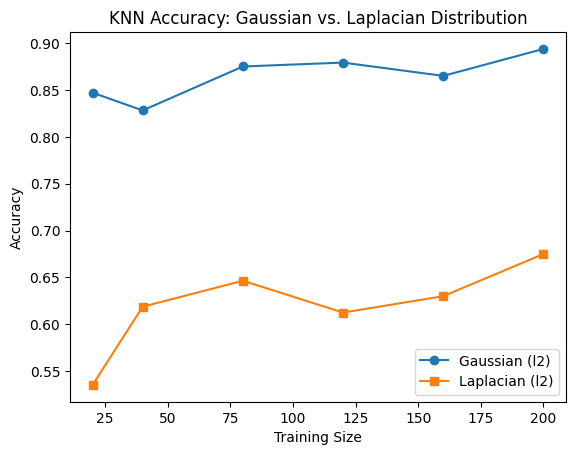

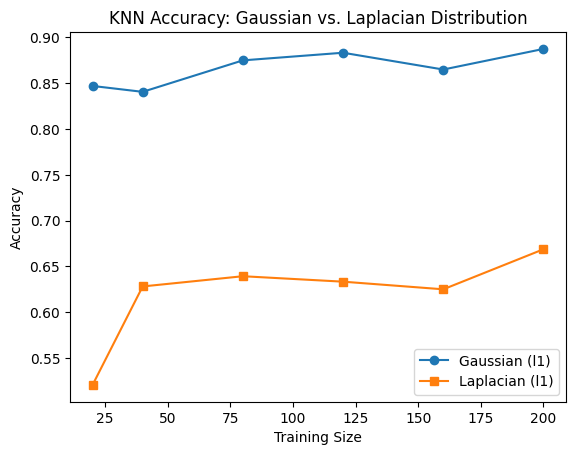

In [ ]:
##################################
#Part(d): Influence of training data on KNN classifier

# Evaluate the performance as the size of the training set grows, e.g., n = {200, 400, 1200,...}. How would you choose a good range for k
# as n changes? What can you say about the stability of the solution? Check by repeating the validation multiple times.

# Investigate how the distribution of the training data affects the performance of the KNN algorithm. Replace the Gaussian distribution used
# in part (a) with a Laplacian distribution. Generate both training and testing datasets based on these distributions. Evaluate the KNN
# classifier's performance on both datasets. Analyze whether the KNN achieves comparable performance with both Gaussian and Laplacian distributed
# data. Examine the effect of changing the distance metric from  l2  to  l1  on the KNN performance for both Gaussian and Laplacian distributed
# datasets

##################################
#Performance evaluation as n increases

data1 = np.random.multivariate_normal(mean1, cov, 90)
data2 = np.random.multivariate_normal(mean2, cov, 90)
data3 = np.random.multivariate_normal(mean3, cov, 90)
data4 = np.random.multivariate_normal(mean4, cov, 90)

train_size = [5, 10, 20, 30, 40, 50]
rho = 0.3
repetitions = 10
test_accuracy = []
best_k_val = {}

for n in train_size:
  #Generate training data
  X_train = np.array(np.concatenate((data1[:n], data2[:n], data3[:n], data4[:n]), axis=0))
  Y_train = np.array(np.concatenate((np.ones(n), -np.ones(n), -np.ones(n), np.ones(n)), axis=0))

  #Generate testing data
  X_test = np.array(np.concatenate((data1[n:], data2[n:], data3[n:], data4[n:]), axis=0))
  Y_test = np.array(np.concatenate((np.ones(len(data1)-n), -np.ones(len(data1)-n), -np.ones(len(data1)-n), np.ones(len(data1)-n)), axis=0))

  model = KNeighborsClassifier(5, "l2")
  model.fit(X_train, Y_train)

  # Perform cross-validation to determine best k
  k_range = range(1, int(np.sqrt(n * 4)) + 1, 2)
  best_k, _, _ = holdoutCVkNN(k_range, rho, repetitions, model)
  best_k_val[n] = best_k

  # Train and evaluate KNN on the test set
  model.n_neighbors = best_k
  y_pred = model.predict(X_test)
  test_accuracy.append(KNNAccuracy(Y_test, y_pred))

plt.plot([x * 4 for x in train_size], test_accuracy, marker='o', label="Test Accuracy")
for size, acc in zip([x * 4 for x in train_size], test_accuracy):
    plt.annotate(f'({size}, {acc:.3f})', (size, acc), textcoords="offset points", xytext=(5,5), ha='center',
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

plt.xlabel('Train size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Train size')
plt.legend()
plt.show()

plt.plot([x * 4 for x in train_size], best_k_val.values(), marker='o', label="Best k")

for size, k in zip([x * 4 for x in train_size], best_k_val.values()):
    plt.annotate(f'({size}, {k})', (size, k),
                 textcoords="offset points", xytext=(7,7), ha='center',
                 fontsize=10, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

plt.xlabel('Train size')
plt.ylabel('Best k')
plt.title('Best k vs. Train size')
plt.legend()
plt.show()


#Performance evaluation with different data distributions, i.e., Gaussian, Laplacian

laplace_data1 = np.random.laplace(mean1, 0.5, (90, 2))
laplace_data2 = np.random.laplace(mean2, 0.5, (90, 2))
laplace_data3 = np.random.laplace(mean3, 0.5, (90, 2))
laplace_data4 = np.random.laplace(mean4, 0.5, (90, 2))

gaussian_accuracy_l2 = []
gaussian_accuracy_l1 = []

laplacian_accuracy_l2 = []
laplacian_accuracy_l1 = []

for n in train_size:
    # Generate training data (Gaussian)
    X_train_gaussian = np.concatenate((data1[:n], data2[:n], data3[:n], data4[:n]), axis=0)
    Y_train_gaussian = np.concatenate((np.ones(n), -np.ones(n), -np.ones(n), np.ones(n)), axis=0)
    X_test_gaussian = np.concatenate((data1[n:], data2[n:], data3[n:], data4[n:]), axis=0)
    Y_test_gaussian = np.concatenate((np.ones(len(data1)-n), -np.ones(len(data1)-n), -np.ones(len(data1)-n), np.ones(len(data1)-n)), axis=0)

    # Generate training data (Laplacian)
    X_train_laplace = np.concatenate((laplace_data1[:n], laplace_data2[:n], laplace_data3[:n], laplace_data4[:n]), axis=0)
    Y_train_laplace = np.array(Y_train_gaussian)
    X_test_laplace = np.concatenate((laplace_data1[n:], laplace_data2[n:], laplace_data3[n:], laplace_data4[n:]), axis=0)
    Y_test_laplace = np.array(Y_test_gaussian)

    # Train and test on Gaussian data (l2 distance)
    model = KNeighborsClassifier(best_k_val[n], "l2")
    model.fit(X_train_gaussian, Y_train_gaussian)
    y_pred_gaussian = model.predict(X_test_gaussian)
    gaussian_accuracy_l2.append(KNNAccuracy(Y_test_gaussian, y_pred_gaussian))

    # Train and test on Laplacian data (l2 distance)
    model.fit(X_train_laplace, Y_train_laplace)
    y_pred_laplace = model.predict(X_test_laplace)
    laplacian_accuracy_l2.append(KNNAccuracy(Y_test_laplace, y_pred_laplace))

    # l1 distance
    model = KNeighborsClassifier(best_k_val[n], "l1")
    model.fit(X_train_gaussian, Y_train_gaussian)
    y_pred_gaussian = model.predict(X_test_gaussian)
    gaussian_accuracy_l1.append(KNNAccuracy(Y_test_gaussian, y_pred_gaussian))

    model.fit(X_train_laplace, Y_train_laplace)
    y_pred_laplace = model.predict(X_test_laplace)
    laplacian_accuracy_l1.append(KNNAccuracy(Y_test_laplace, y_pred_laplace))

# Plot accuracy comparison for Gaussian vs. Laplacian
plt.plot([x * 4 for x in train_size], gaussian_accuracy_l2, marker='o', label="Gaussian (l2)")
plt.plot([x * 4 for x in train_size], laplacian_accuracy_l2, marker='s', label="Laplacian (l2)")

plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy: Gaussian vs. Laplacian Distribution")
plt.legend()
plt.show()

plt.plot([x * 4 for x in train_size], gaussian_accuracy_l1, marker='o', label="Gaussian (l1)")
plt.plot([x * 4 for x in train_size], laplacian_accuracy_l1, marker='s', label="Laplacian (l1)")

plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy: Gaussian vs. Laplacian Distribution")
plt.legend()
plt.show()



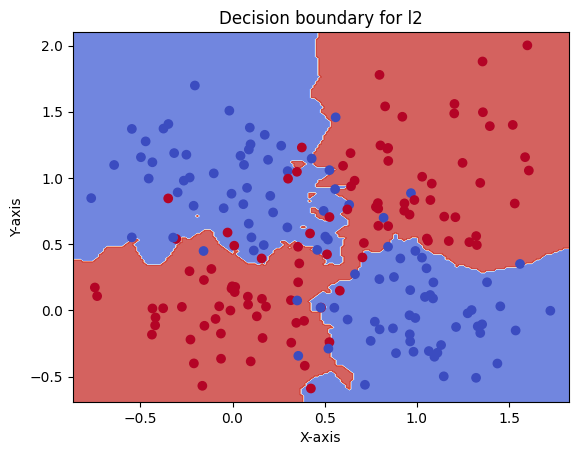

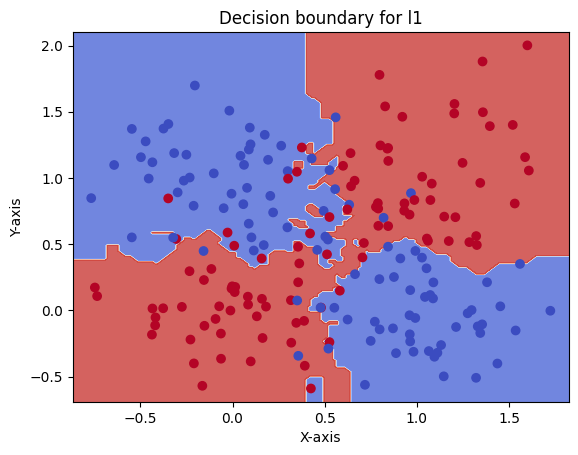

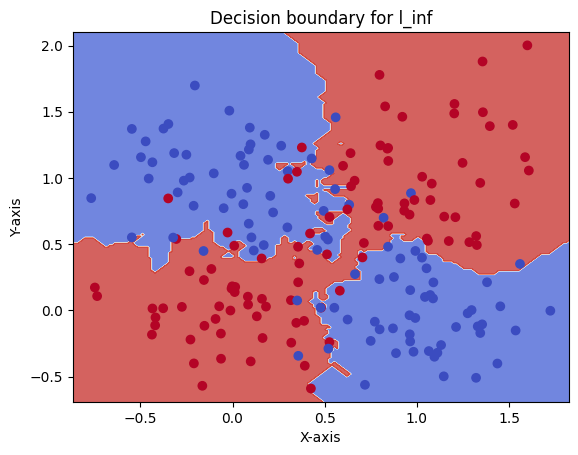

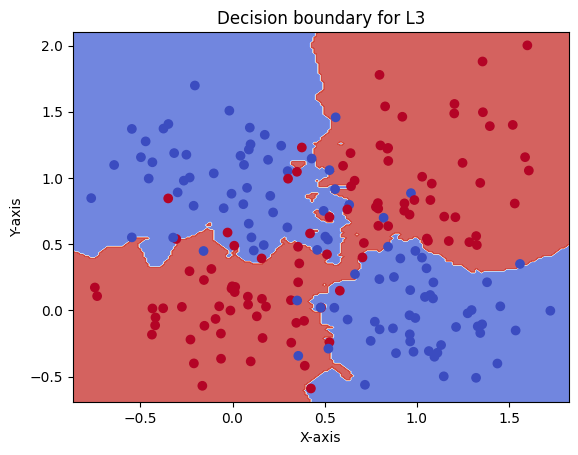

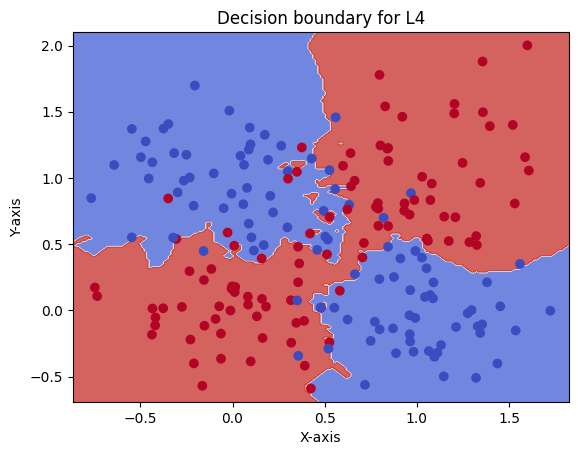

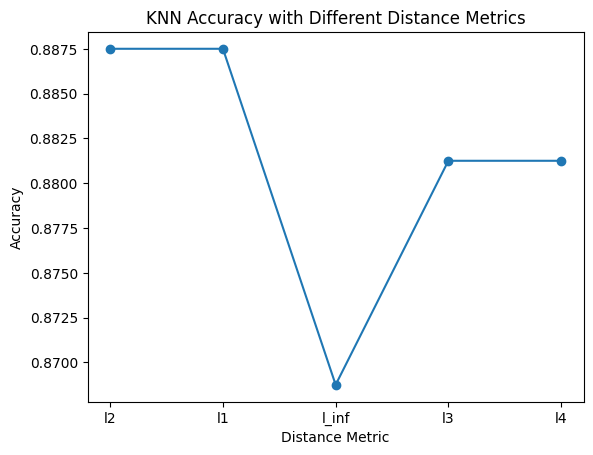

In [ ]:
##################################
#Part(e): Influence of distance metric on KNN classifier

# Evaluate the performance of the KNN classifier with different distance measures such as  l1 ,  l2 , etc,.
# Plot the decision regions of the KNN classifier with different distance measures.
# Report your observations.

##################################
#Performance evaluation of KNN classifier with different distance metric

distance_metrics = ["l2", "l1", "l_inf"]
accuracy_scores = []

x_min, x_max = X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1
y_min, y_max = X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1

grid_x = np.linspace(x_min, x_max, 200)
grid_y = np.linspace(y_min, y_max, 200)
X, Y = np.meshgrid(grid_x, grid_y)

points = np.c_[X.ravel(), Y.ravel()]

for distance_metric in distance_metrics:
    knn = KNeighborsClassifier(5, distance_metric)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(KNNAccuracy(Y_test, y_pred))

    predictions = knn.predict(points).reshape(X.shape)

    plt.contourf(X, Y, predictions, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=plt.cm.coolwarm)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title(f"Decision boundary for {distance_metric}")
    plt.show()

for i in range(3,5):
  knn = KNeighborsClassifier(5, "lp", i)
  knn.fit(X_train, Y_train)
  y_pred = knn.predict(X_test)
  accuracy_scores.append(KNNAccuracy(Y_test, y_pred))
  distance_metrics.append(f"l{i}")

  predictions = knn.predict(points).reshape(X.shape)

  plt.contourf(X, Y, predictions, cmap=plt.cm.coolwarm, alpha=0.8)
  plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=plt.cm.coolwarm)
  plt.xlim(x_min, x_max)
  plt.ylim(y_min, y_max)
  plt.xlabel("X-axis")
  plt.ylabel("Y-axis")
  plt.title(f"Decision boundary for L{i}")
  plt.show()

plt.plot(distance_metrics, accuracy_scores, marker="o")
plt.xlabel("Distance Metric")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy with Different Distance Metrics")
plt.show()


Images: (70000, 784)
Targets: (70000,)


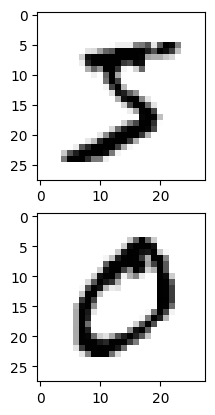

In [ ]:
##################################
#Part(f): MNIST Digit classification using KNN classifier

# 1) Use the above written KNN classifier to perform digit claissification using MNIST digit dataset.
# 2) The MNIST dataset consists of approximately 70,000 images of handwritten digits. Create training, validation, and test datasets
#    from this entire dataset with the respective proportions of 80%, 10%, and 10%. The 28x28 images in the MNIST data set may be flattened
#    to arrive at a 784 dimensional vector.
# 3) Use the most suitable distance metric and k to maximize the test data performance.
# 4) Create a confusion matrix to understand the most confused classes (digits).
# 5) Suggest alternate ways to improve the performance.

##################################

#Load MNIST data
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml


mnist = fetch_openml('mnist_784')
images = mnist.data.to_numpy()
targets = mnist.target.to_numpy()

print(f"Images: {images.shape}")
print(f"Targets: {targets.shape}")

#Plot a few images
plt.subplot(211)
plt.imshow((images[0].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(212)
plt.imshow(images[1].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')

In [ ]:

#Create train, validation and test splits

# ORIGINAL
# num_samples = images.shape[0]
# train_size = int(0.8 * num_samples)
# val_size = int(0.1 * num_samples)
# test_size = num_samples - train_size - val_size


# USED FOR TESTING
indices = np.random.permutation(images.shape[0])
images = images[indices]
targets = targets[indices]
train_size = 800
val_size = 200
test_size = 2000


# Splitting into train, validation and test sets
train_images = images[:train_size]
train_targets = targets[:train_size]

val_images = images[train_size:train_size + val_size]
val_targets = targets[train_size:train_size + val_size]

test_images = images[train_size + val_size:train_size + val_size + test_size]
test_targets = targets[train_size + val_size:train_size + val_size + test_size]


#Write 'MultiClassKNNClassify' function
def MultiClassKNNClassify(X_train, Y_train, X_val, Y_val, k_values, distance_metric):
  accuracy = {}
  knn = KNeighborsClassifier(5, distance_metric)
  knn.fit(X_train, Y_train)

  for k in k_values:
    knn.n_neighbors = k
    y_pred = knn.predict(X_val)
    accuracy[k] = KNNAccuracy(Y_val, y_pred)

  best_k = max(accuracy, key=accuracy.get)
  print(f"Best k: {best_k}")
  return best_k



k_values = [1, 3, 5, 7, 9]
distance_metric = "l2"
best_k = MultiClassKNNClassify(train_images, train_targets, val_images, val_targets, k_values, distance_metric)

knn.n_neighbors = best_k
knn.distance_metric = "l2"
knn.fit(train_images, train_targets)

y_pred = knn.predict(test_images)
accuracy = KNNAccuracy(test_targets, y_pred)
print(f"Accuracy on test data: {accuracy}")


#Create a confusion matrix for test data
def compute_confusion_matrix(true, pred):
    #Inputs: Ground truth labels and classifier predictions
    #Outputs: Confusion matrix
    #Confusion matrix: A confusion matrix is a table that summarizes the performance of a classification model by comparing its predictions to the actual ground truth values
    #Rows: Represent the actual class labels
    #Columns: Represent the predicted class labels


    num_classes = len(np.unique(true))
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)
    for i in range(len(true)):
        confusion_matrix[int(true[i]), int(pred[i])] += 1
    return confusion_matrix

confusion_matrix = compute_confusion_matrix(test_targets, y_pred)
print("Confusion matrix:")
print(confusion_matrix)


#Suggest an alternative ways to improve performance





Best k: 3
Accuracy on test data: 0.881
Confusion matrix:
[[177   0   1   0   0   2   1   1   1   0]
 [  0 219   0   0   0   1   0   1   0   0]
 [  5  10 167   5   1   1   1   9   4   1]
 [  1   4   4 174   0   5   0   3   8   1]
 [  0   8   0   0 165   0   3   2   0  26]
 [  3   4   0   8   2 156   5   1   5   1]
 [  2   1   1   0   1   5 204   0   1   0]
 [  0   8   2   0   3   3   0 174   0   8]
 [  2   7   3   8   2   9   3   0 161   4]
 [  0   2   2   4   5   2   0  11   0 165]]


<b> Report your observations </b>
1. Write down the best accuracy on synthetic test data generated from Gaussian distribution

2. Write down the best accuracy on MNIST validation and test data.

3. Report your observations on the confusion matrix of KNN classifier on MNIST test data


##Observations on the Confusion Matrix:
1. High Diagonal Values:

  - The matrix has relatively high values along the diagonal, indicating that the classifier performs well overall, correctly classifying most instances of each class.

2. Misclassifications in Some Classes:

  - Some classes have noticeable misclassifications.

3. Relatively Good Performance in Certain Classes.

4. Possible Class Confusions:

  - The classifier struggles with distinguishing between certain pairs of classes.This might be due to similarities in features between these classes.

5. Overall Accuracy Trend:

  - The classifier does well in most cases but has a few notable misclassifications, which could indicate overlapping feature distributions or inadequate training data for certain classes.